In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 180)

CSV_PATH = Path("data/biroylikgarovsizlar.csv")  # <-- change if needed
REPORTS = Path("report"); REPORTS.mkdir(exist_ok=True)

df = pd.read_csv(CSV_PATH)
print(df.shape)
df.head(10)


(189, 8)


,Код,Наименование,Облать,Город/район,Номер,Дата,Сумма,% ставка
0,99214567,KENJAYEV ABDURASHID TO’XTASHBOYEVICH,АНДИЖОН ВИЛОЯТИ,АНДИЖОН ТУМАНИ,02-1475/25K,01.08.2025,"10,000,000.00",49.0
1,99224899,TOJIBOYEVA XAMIDA XABIBULLAYEVNA,АНДИЖОН ВИЛОЯТИ,АНДИЖОН ТУМАНИ,02-1481/25K,01.08.2025,"36,000,000.00",49.0
2,99224922,MIRZAYEV TOJIDIN XXX,АНДИЖОН ВИЛОЯТИ,АНДИЖОН ТУМАНИ,02-1482/25K,04.08.2025,"4,000,000.00",49.0
3,99056647,Xalmatova Odinaxon Karimovna,АНДИЖОН ВИЛОЯТИ,ПАХТАОБОД ТУМАНИ,02-1487/25K,04.08.2025,"5,000,000.00",49.0
4,99217965,MIRZAYEVA XIMOYATXON KOMOLDINOVNA,АНДИЖОН ВИЛОЯТИ,АНДИЖОН ТУМАНИ,02-1488/25K,04.08.2025,"5,000,000.00",49.0
5,99224978,TOJIBOYEV XURSHIDBEK JURAYEVICH,АНДИЖОН ВИЛОЯТИ,ХУЖАОБОД ТУМАНИ,02-1489/25K,04.08.2025,"10,000,000.00",49.0
6,99225030,UMURZAKOVA KIMYOXON AMANBAYEVNA,АНДИЖОН ВИЛОЯТИ,ХУЖАОБОД ТУМАНИ,02-1495/25K,04.08.2025,"3,000,000.00",49.0
7,99225085,YULDASHEVA DILFUZAXON ZAKIRJONOVNA,АНДИЖОН ВИЛОЯТИ,АНДИЖОН ШАХРИ,02-1501/25K,04.08.2025,"3,000,000.00",49.0
8,99225150,RUZMATOV XAMIDJON TO’YCHIYEVICH,АНДИЖОН ВИЛОЯТИ,МАРХАМАТ ТУМАНИ,02-1508/25K,04.08.2025,"5,000,000.00",49.0
9,99225271,SOLIJONOVA MALIKA RO’ZIYEVNA,АНДИЖОН ВИЛОЯТИ,АНДИЖОН ТУМАНИ,02-1517/25K,05.08.2025,"4,000,000.00",49.0


In [3]:
print("Columns:", list(df.columns))
print("\nDtypes:\n", df.dtypes)
print("\nUnique counts (top 20 cols):")
uc = df.nunique(dropna=False).sort_values(ascending=False)
uc.head(20)


Columns: ['Код', 'Наименование', 'Облать', 'Город/район', 'Номер', 'Дата', 'Сумма', '% ставка']

Dtypes:
 Код               int64
Наименование     object
Облать           object
Город/район      object
Номер            object
Дата             object
Сумма            object
% ставка        float64
dtype: object

Unique counts (top 20 cols):


Номер           189
Код             188
Наименование    188
Дата             34
Сумма            24
Город/район      17
Облать            3
% ставка          1
dtype: int64

In [4]:
x = df.copy()

x["Дата_parsed"] = pd.to_datetime(x["Дата"], errors="coerce", dayfirst=True)

x["Сумма_num"] = (
    x["Сумма"].astype(str)
      .str.replace("\xa0", "", regex=False)
      .str.replace(" ", "", regex=False)
      .str.replace(",", "", regex=False)
      .str.replace("\u2009", "", regex=False)
)
x["Сумма_num"] = pd.to_numeric(x["Сумма_num"], errors="coerce")

x["Год"] = x["Дата_parsed"].dt.year
x["Месяц"] = x["Дата_parsed"].dt.to_period("M").astype(str)

COL_REGION = "Облать"
COL_DIST   = "Город/район"
COL_NAME   = "Наименование"

print(
    "Parsed date nulls:", x["Дата_parsed"].isna().sum(),
    "| Amount nulls:", x["Сумма_num"].isna().sum()
)


Parsed date nulls: 0 | Amount nulls: 0


In [5]:
kpis = {
    "Записей (loans)": len(x),
    "Уникальных заемщиков": x[COL_NAME].nunique(),
    "Регионов": x[COL_REGION].nunique(),
    "Районов": x[COL_DIST].nunique(),
    "Всего сумма (UZS)": float(x["Сумма_num"].sum()),
    "Средняя сумма (UZS)": float(x["Сумма_num"].mean()),
    "Медиана суммы (UZS)": float(x["Сумма_num"].median()),
    "Мин/Макс сумма (UZS)": (float(x["Сумма_num"].min()), float(x["Сумма_num"].max())),
    "Средняя % ставка": float(x["% ставка"].mean()),
}
pd.Series(kpis)


Записей (loans)                             189
Уникальных заемщиков                        188
Регионов                                      3
Районов                                      17
Всего сумма (UZS)                  1804500000.0
Средняя сумма (UZS)              9547619.047619
Медиана суммы (UZS)                   8000000.0
Мин/Макс сумма (UZS)    (3000000.0, 40000000.0)
Средняя % ставка                           49.0
dtype: object

In [6]:
miss = pd.DataFrame({
    "missing_cnt": x.isna().sum(),
    "missing_%": (x.isna().mean()*100).round(1),
    "dtype": x.dtypes.astype(str),
}).sort_values("missing_%", ascending=False)
miss


,missing_cnt,missing_%,dtype
Код,0,0.0,int64
Наименование,0,0.0,object
Облать,0,0.0,object
Город/район,0,0.0,object
Номер,0,0.0,object
Дата,0,0.0,object
Сумма,0,0.0,object
% ставка,0,0.0,float64
Дата_parsed,0,0.0,datetime64[ns]
Сумма_num,0,0.0,float64


In [7]:
by_region = pd.DataFrame({
    "sum_amount": x.groupby(COL_REGION)["Сумма_num"].sum(),
    "count": x.groupby(COL_REGION)["Код"].count(),
})
by_region["avg_amount"] = by_region["sum_amount"] / by_region["count"]
by_region = by_region.sort_values("sum_amount", ascending=False)
by_region


,sum_amount,count,avg_amount
Облать,,,
АНДИЖОН ВИЛОЯТИ,1.772500e+09,187,9.478610e+06
НАМАНГАН ВИЛОЯТИ,2.000000e+07,1,2.000000e+07
ФАРГОНА ВИЛОЯТИ,1.200000e+07,1,1.200000e+07


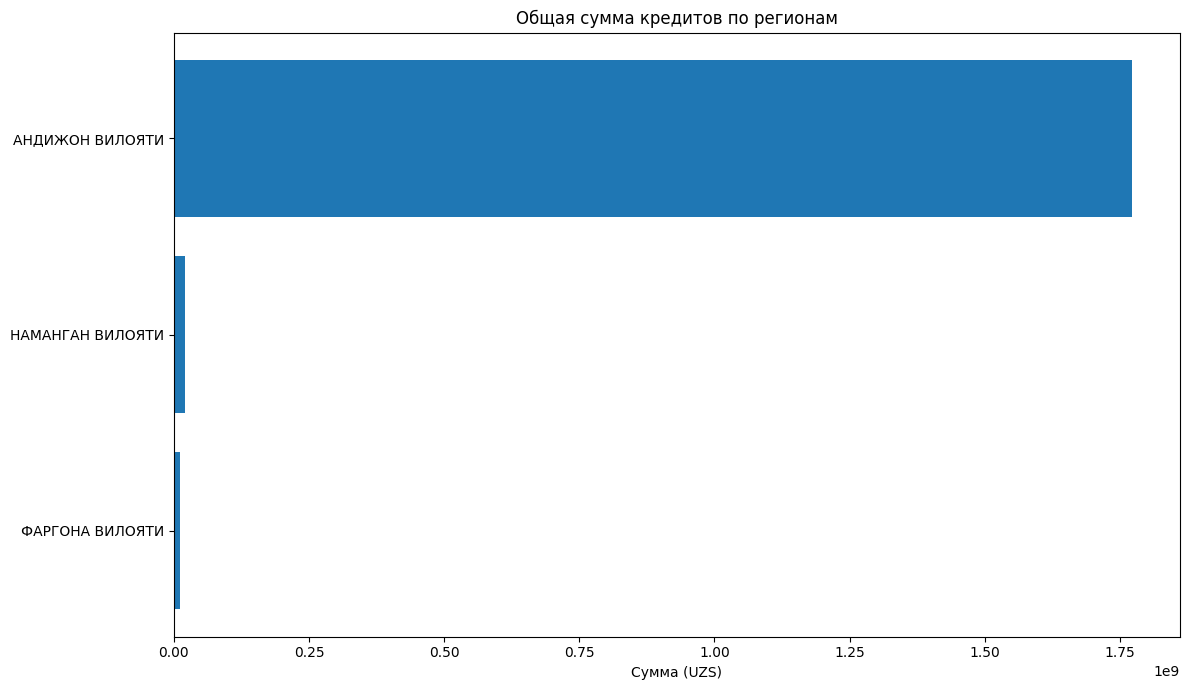

In [8]:
plt.figure(figsize=(12, 7))
vals = by_region["sum_amount"].values
idx  = by_region.index.astype(str)
plt.barh(idx[::-1], vals[::-1])
plt.title("Общая сумма кредитов по регионам")
plt.xlabel("Сумма (UZS)")
plt.tight_layout(); plt.savefig(REPORTS/"region_sum.png", dpi=150); plt.show()


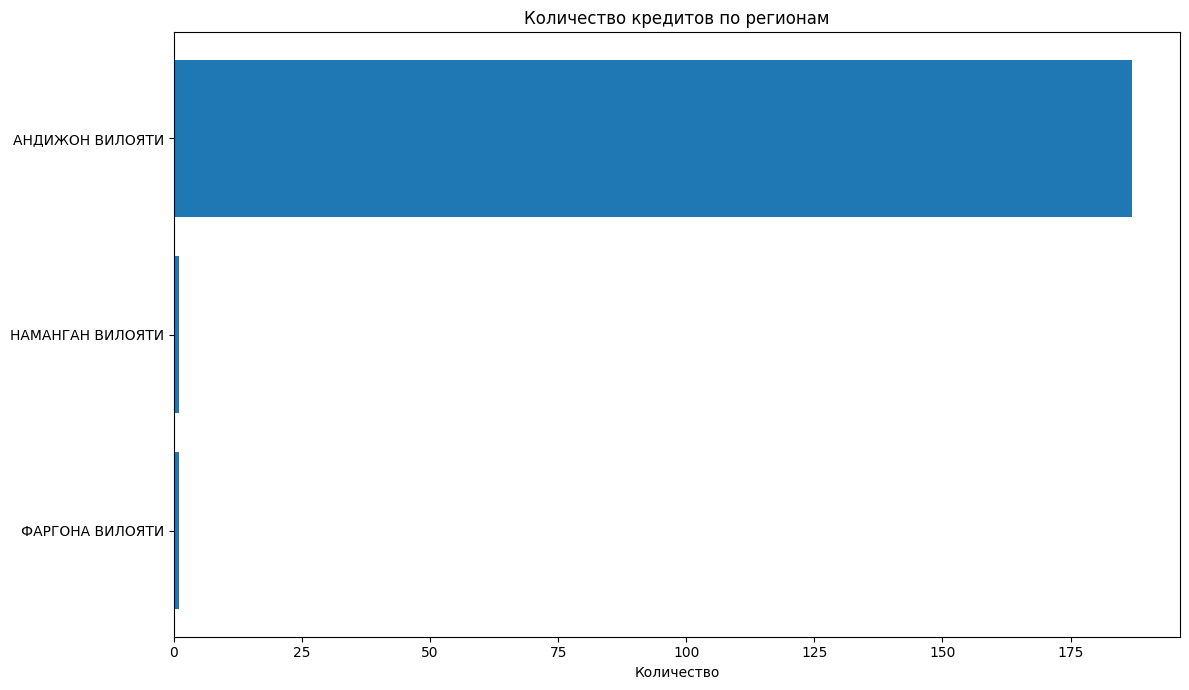

In [11]:
by_region_cnt = by_region.sort_values("count", ascending=False)
plt.figure(figsize=(12, 7))
plt.barh(by_region_cnt.index.astype(str)[::-1], by_region_cnt["count"].values[::-1])
plt.title("Количество кредитов по регионам")
plt.xlabel("Количество")
plt.tight_layout(); plt.savefig(REPORTS/"region_count.png", dpi=150); plt.show()


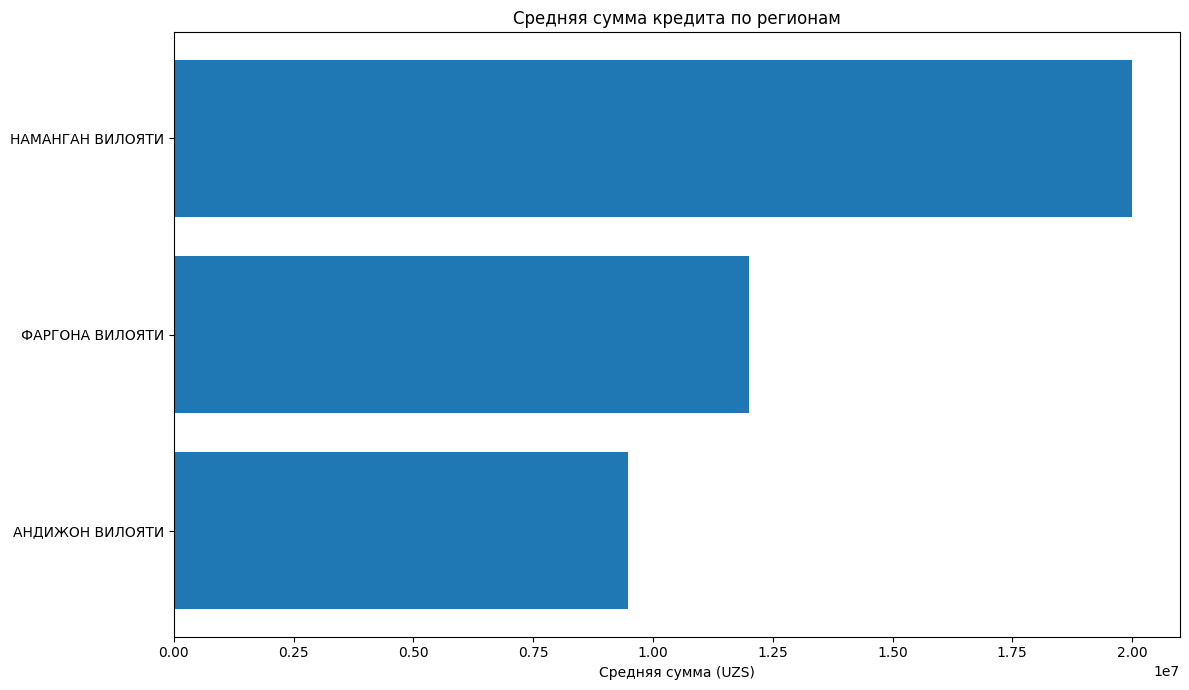

In [12]:
by_region_avg = by_region.sort_values("avg_amount", ascending=False)
plt.figure(figsize=(12, 7))
plt.barh(by_region_avg.index.astype(str)[::-1], by_region_avg["avg_amount"].values[::-1])
plt.title("Средняя сумма кредита по регионам")
plt.xlabel("Средняя сумма (UZS)")
plt.tight_layout(); plt.savefig(REPORTS/"region_avg.png", dpi=150); plt.show()


In [13]:
by_district = (
    x.groupby([COL_REGION, COL_DIST])["Сумма_num"]
      .sum()
      .sort_values(ascending=False)
      .head(20)
      .to_frame("sum_amount")
)
by_district


sum_amount
Облать           Город/район                   
АНДИЖОН ВИЛОЯТИ  АНДИЖОН ШАХРИ      598000000.0
                 АНДИЖОН ТУМАНИ     480500000.0
                 ОЛТИНКУЛ ТУМАНИ    138000000.0
                 ХУЖАОБОД ТУМАНИ    105000000.0
                 ИЗБОСКАН ТУМАНИ     82000000.0
                 АСАКА ТУМАНИ        75000000.0
                 МАРХАМАТ ТУМАНИ     62000000.0
                 БУЛОКБОШИ ТУМАНИ    51000000.0
                 ЖАЛОЛКУДУК ТУМАНИ   41000000.0
                 КУРГОНТЕПА ТУМАНИ   38000000.0
                 УЛУГНОР ТУМАНИ      35000000.0
                 ПАХТАОБОД ТУМАНИ    26000000.0
НАМАНГАН ВИЛОЯТИ НОРИН ТУМАНИ        20000000.0
АНДИЖОН ВИЛОЯТИ  ШАХРИХОН ТУМАНИ     18000000.0
                 БУСТОН ТУМАНИ       13000000.0
ФАРГОНА ВИЛОЯТИ  БУВАЙДА ТУМАНИ      12000000.0
АНДИЖОН ВИЛОЯТИ  БАЛИКЧИ ТУМАНИ      10000000.0

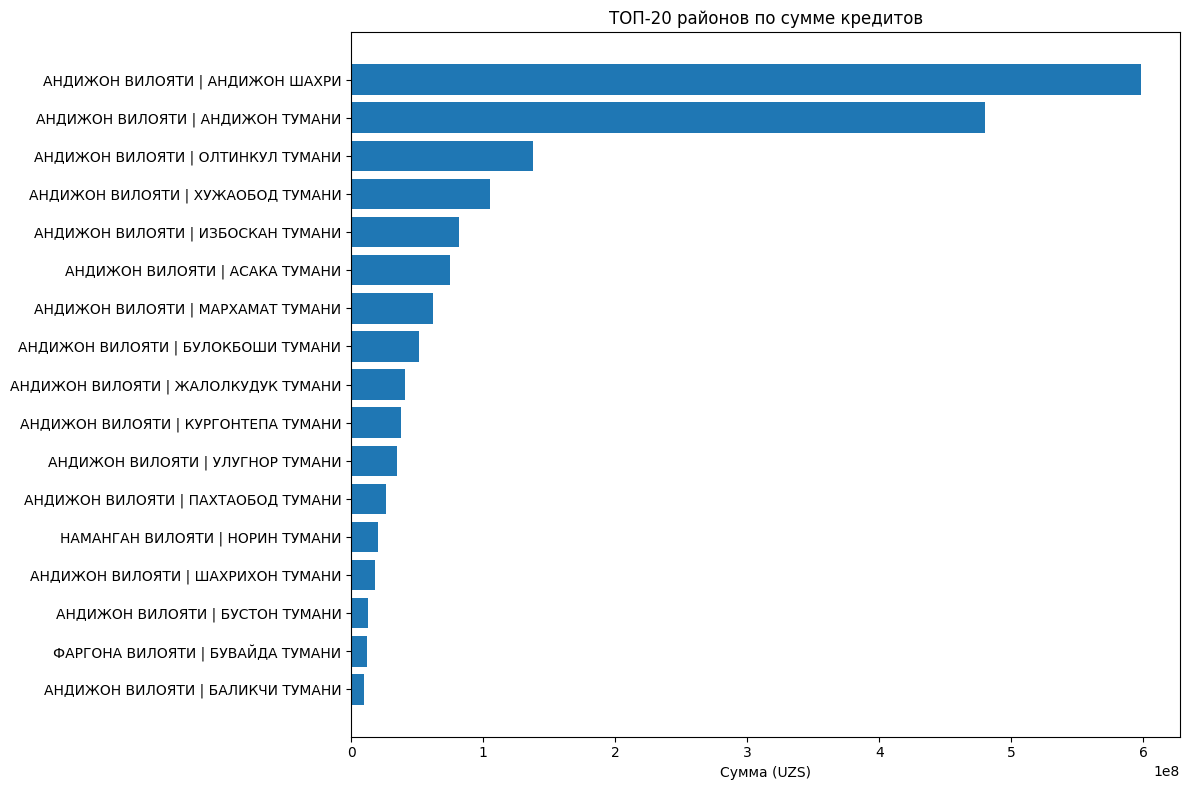

In [14]:
plt.figure(figsize=(12, 8))
labels = [f"{r} | {d}" for r,d in by_district.index]
plt.barh(labels[::-1], by_district["sum_amount"].values[::-1])
plt.title("ТОП-20 районов по сумме кредитов")
plt.xlabel("Сумма (UZS)")
plt.tight_layout(); plt.savefig(REPORTS/"district_top20.png", dpi=150); plt.show()


In [15]:
monthly = x.dropna(subset=["Дата_parsed"]).copy()
monthly["YYYYMM"] = monthly["Дата_parsed"].dt.to_period("M").astype(str)

by_month = monthly.groupby("YYYYMM").agg(
    count=("Код", "count"),
    sum_amount=("Сумма_num", "sum")
).sort_index()
by_month


,count,sum_amount
YYYYMM,,
2025-08,107,1.043500e+09
2025-09,82,7.610000e+08


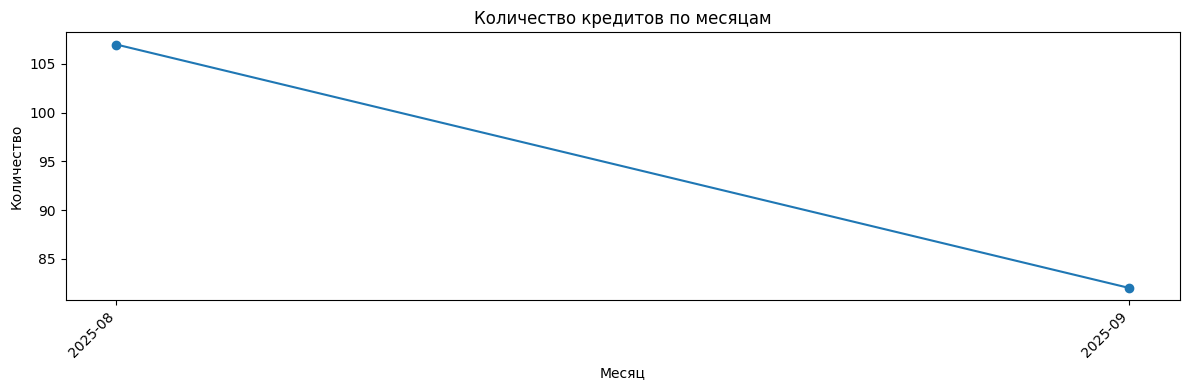

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(by_month.index, by_month["count"], marker="o")
plt.title("Количество кредитов по месяцам")
plt.xlabel("Месяц"); plt.ylabel("Количество")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.savefig(REPORTS/"monthly_count.png", dpi=150); plt.show()


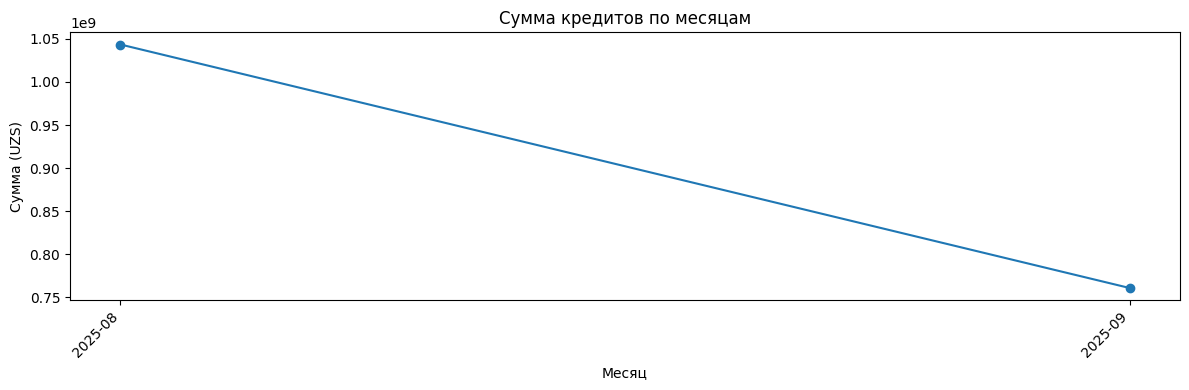

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(by_month.index, by_month["sum_amount"], marker="o")
plt.title("Сумма кредитов по месяцам")
plt.xlabel("Месяц"); plt.ylabel("Сумма (UZS)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.savefig(REPORTS/"monthly_sum.png", dpi=150); plt.show()


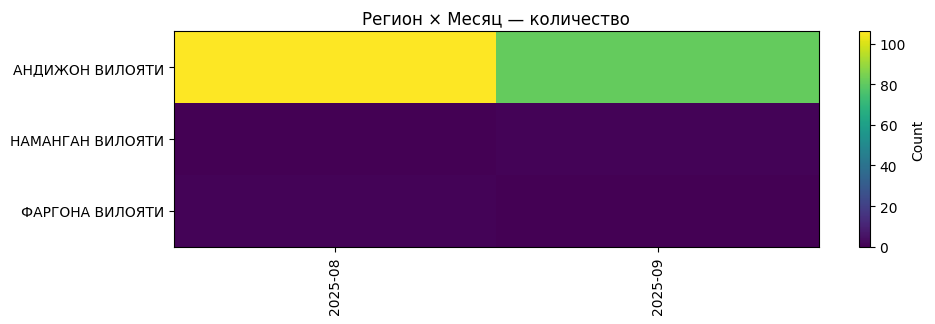

In [18]:
pivot_cnt = (
    monthly.pivot_table(index=COL_REGION, columns="YYYYMM", values="Код", aggfunc="count", fill_value=0)
)
plt.figure(figsize=(max(10, 0.45*len(pivot_cnt.columns)), 0.45*len(pivot_cnt.index)+2))
plt.imshow(pivot_cnt.values, aspect="auto", interpolation="nearest")
plt.title("Регион × Месяц — количество")
plt.colorbar(label="Count")
plt.yticks(range(len(pivot_cnt.index)), pivot_cnt.index.astype(str))
plt.xticks(range(len(pivot_cnt.columns)), pivot_cnt.columns.astype(str), rotation=90)
plt.tight_layout(); plt.savefig(REPORTS/"heatmap_region_month_count.png", dpi=150); plt.show()


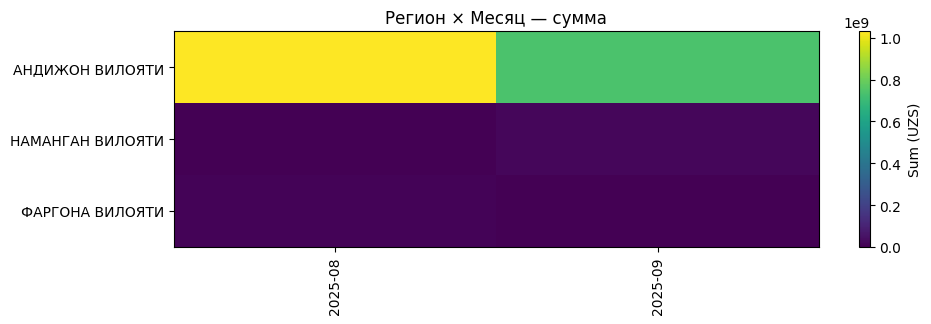

In [19]:
pivot_sum = (
    monthly.pivot_table(index=COL_REGION, columns="YYYYMM", values="Сумма_num", aggfunc="sum", fill_value=0.0)
)
plt.figure(figsize=(max(10, 0.45*len(pivot_sum.columns)), 0.45*len(pivot_sum.index)+2))
plt.imshow(pivot_sum.values, aspect="auto", interpolation="nearest")
plt.title("Регион × Месяц — сумма")
plt.colorbar(label="Sum (UZS)")
plt.yticks(range(len(pivot_sum.index)), pivot_sum.index.astype(str))
plt.xticks(range(len(pivot_sum.columns)), pivot_sum.columns.astype(str), rotation=90)
plt.tight_layout(); plt.savefig(REPORTS/"heatmap_region_month_sum.png", dpi=150); plt.show()


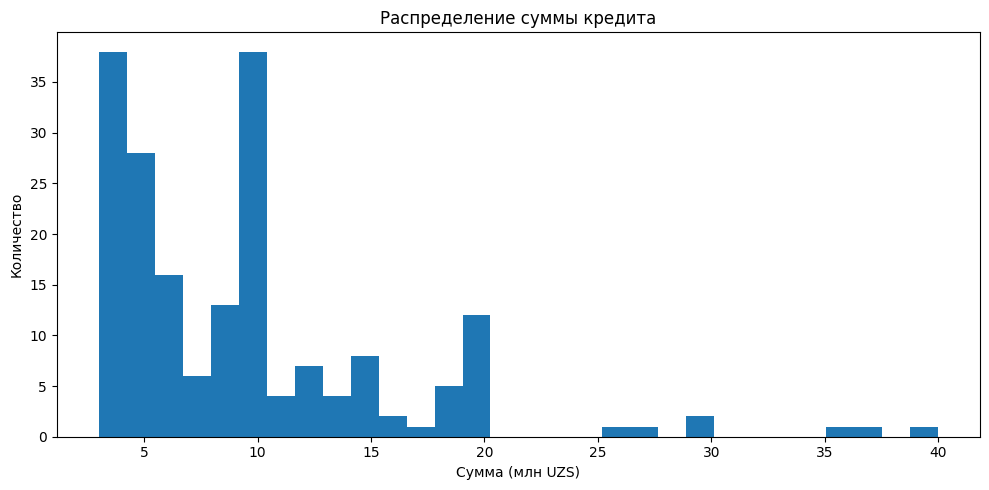

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(x["Сумма_num"].dropna() / 1e6, bins=30)
plt.title("Распределение суммы кредита")
plt.xlabel("Сумма (млн UZS)"); plt.ylabel("Количество")
plt.tight_layout(); plt.savefig(REPORTS/"hist_amount.png", dpi=150); plt.show()


In [ ]:
avg_rate_by_region = x.groupby(COL_REGION)["% ставка"].mean().sort_values(ascending=False)
sum_amount_by_region = x.groupby(COL_REGION)["Сумма_num"].sum().sort_values(ascending=False)

display(avg_rate_by_region.head(10).to_frame("avg_rate_%"))
display(sum_amount_by_region.head(10).to_frame("sum_amount"))


,avg_rate_%
Облать,
АНДИЖОН ВИЛОЯТИ,49.0
НАМАНГАН ВИЛОЯТИ,49.0
ФАРГОНА ВИЛОЯТИ,49.0


,sum_amount
Облать,
АНДИЖОН ВИЛОЯТИ,1.772500e+09
НАМАНГАН ВИЛОЯТИ,2.000000e+07
ФАРГОНА ВИЛОЯТИ,1.200000e+07


In [28]:
top_borrowers = (
    x.groupby([COL_NAME, COL_REGION], dropna=False)["Сумма_num"]
     .sum()
     .sort_values(ascending=False)
     .head(30)
     .to_frame("sum_amount")
)
top_borrowers



,,sum_amount
Наименование,Облать,
YEGOROVA XALIDA XABIBULLAYEVNA,АНДИЖОН ВИЛОЯТИ,40000000.0
SHAXOBIDDINOV XAYOTILLO MADIXO’JA O’G’LI,АНДИЖОН ВИЛОЯТИ,37500000.0
TOJIBOYEVA XAMIDA XABIBULLAYEVNA,АНДИЖОН ВИЛОЯТИ,36000000.0
ABDULLAYEVA XOLIDAXON FOZILOVNA,АНДИЖОН ВИЛОЯТИ,30000000.0
TOSHTEMIROV ULUG’BEK MAXAMATSOLIYEVICH,АНДИЖОН ВИЛОЯТИ,30000000.0
Arabboyeva Madinabonu Xayrullo qizi,АНДИЖОН ВИЛОЯТИ,27000000.0
ABDURAXMANOVA ADINA TUXTABAYEVNA,АНДИЖОН ВИЛОЯТИ,26000000.0
MATKARIMOVA NASIBAXON XABIBULLAYEVNA,АНДИЖОН ВИЛОЯТИ,20000000.0
DJAMOLTDINOVA XAMRAXON XXX,АНДИЖОН ВИЛОЯТИ,20000000.0


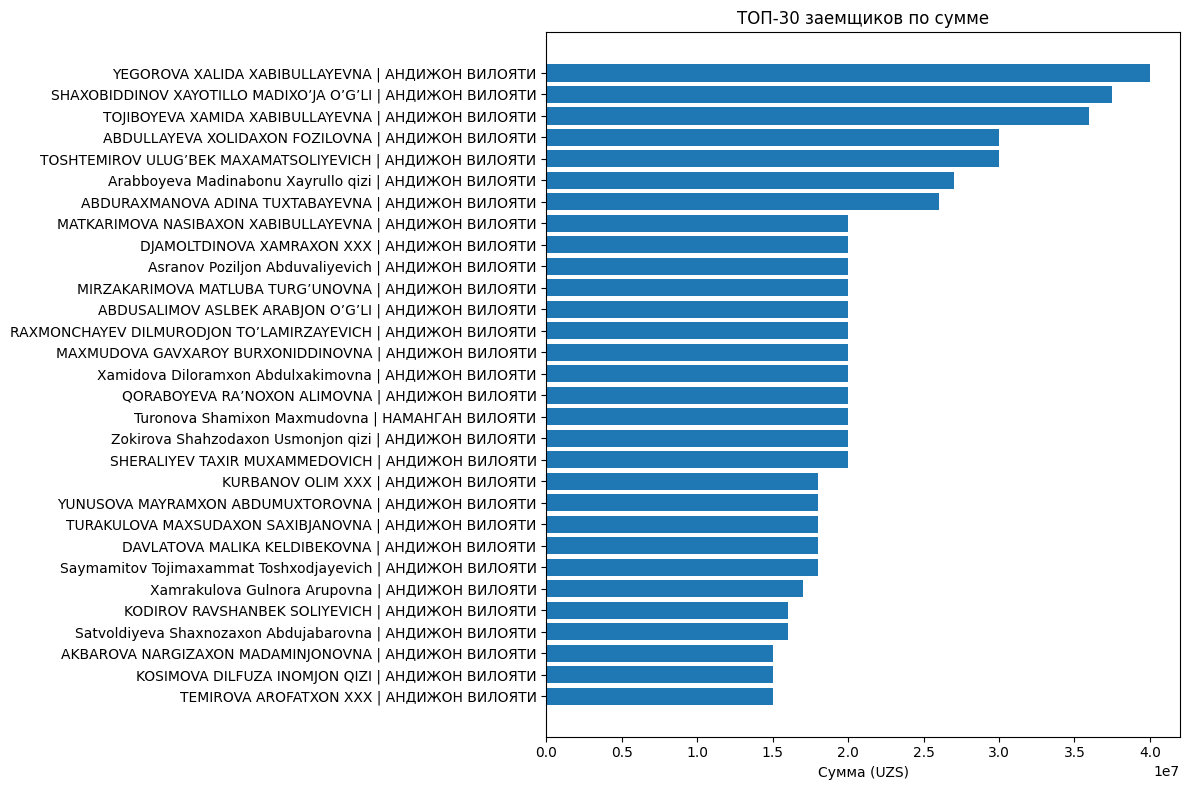

In [29]:
plt.figure(figsize=(12, 8))
labels = [f"{n} | {r}" for (n, r) in top_borrowers.index]
plt.barh(labels[::-1], top_borrowers["sum_amount"].values[::-1])
plt.title("ТОП-30 заемщиков по сумме")
plt.xlabel("Сумма (UZS)")
plt.tight_layout(); plt.savefig(REPORTS/"top_borrowers.png", dpi=150); plt.show()


In [30]:
amt = x["Сумма_num"].dropna()
percentiles = [1,5,10,25,50,75,90,95,99]
pct_vals = np.percentile(amt, percentiles)
pd.DataFrame({"percentile": percentiles, "amount": pct_vals})

,percentile,amount
0,1,3000000.0
1,5,3000000.0
2,10,3000000.0
3,25,5000000.0
4,50,8000000.0
5,75,11000000.0
6,90,18400000.0
7,95,20000000.0
8,99,36180000.0


In [32]:
ranks = amt.rank(method="first")
deciles = pd.qcut(ranks, 10, labels=[f"D{i}" for i in range(1,11)])
dec_cnt = deciles.value_counts().sort_index().to_frame("count")
dec_cnt



,count
Сумма_num,
D1,19
D2,19
D3,19
D4,19
D5,19
D6,18
D7,19
D8,19
D9,19


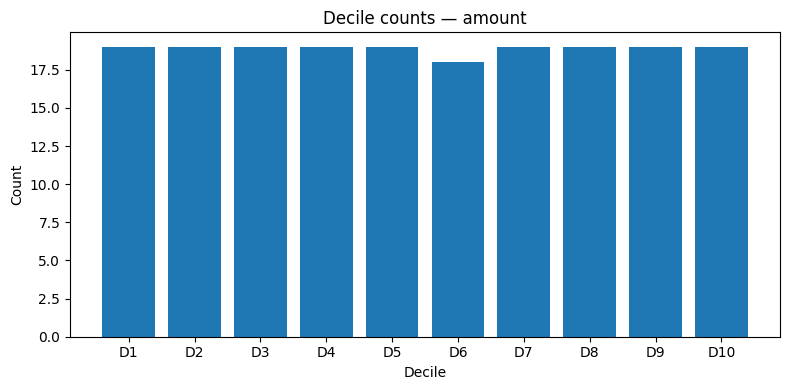

In [33]:
plt.figure(figsize=(8,4))
plt.bar(dec_cnt.index.astype(str), dec_cnt["count"].values)
plt.title("Decile counts — amount")
plt.xlabel("Decile"); plt.ylabel("Count")
plt.tight_layout(); plt.savefig(REPORTS/"decile_counts.png", dpi=150); plt.show()


In [34]:
by_region.to_csv(REPORTS/"by_region_sum_count_avg.csv")
by_district.to_csv(REPORTS/"by_district_top20.csv")
by_month.to_csv(REPORTS/"by_month.csv")
avg_rate_by_region.to_csv(REPORTS/"avg_rate_by_region.csv")
sum_amount_by_region.to_csv(REPORTS/"sum_amount_by_region.csv")
top_borrowers.to_csv(REPORTS/"top_borrowers.csv")
dec_cnt.to_csv(REPORTS/"decile_counts.csv")
print("Saved tables & plots into 'reports/'")


Saved tables & plots into 'reports/'
